# Benchmarking with bioconvert

Benchmarking can be performed using the Bioconvert Python library or the bioconvert command (using -b option)

In [8]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,8)

Populating the interactive namespace from numpy and matplotlib


In [5]:
from bioconvert.fastq2fasta import  FASTQ2FASTA
from easydev import TempFile

# Fastq2fasta benchmark with 1000 reads

Evaluating method seqtk: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 70.78it/s]


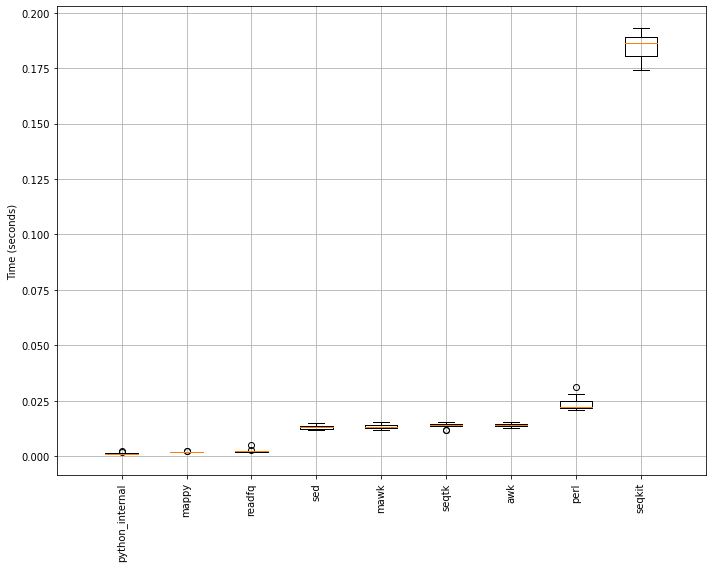

In [18]:
from bioconvert.simulator.fastq import FastqSim
infile = TempFile(suffix=".fastq")
outfile = TempFile(suffix=".fasta")
fs = FastqSim(infile.name)
fs.nreads = 1000 # 1,000,000 by default
fs.simulate()

# Perform the benchmarking
c = FASTQ2FASTA(infile.name, outfile.name)
res = c.boxplot_benchmark(N=10)
savefig("benchmark_1000.png", dpi=200)

# Fastq2fasta benchmark with 1000000 reads

Evaluating method seqtk: 100%|████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.54it/s]


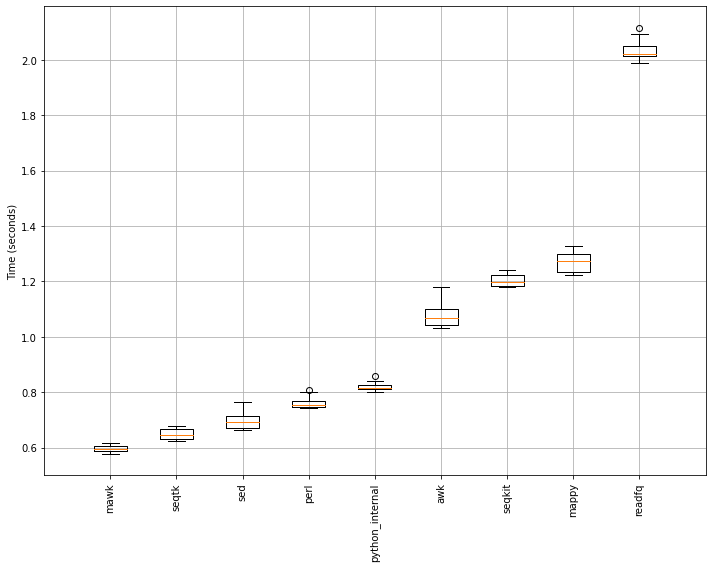

In [56]:
from bioconvert.simulator.fastq import FastqSim
infile = TempFile(suffix=".fastq")
outfile = TempFile(suffix=".fasta")
fs = FastqSim(infile.name)
fs.nreads = 1000000 # 1,000,000 by default
fs.simulate()

# Perform the benchmarking
c = FASTQ2FASTA(infile.name, outfile.name)
res = c.boxplot_benchmark(N=10)
savefig('benchmark_1000000.png', dpi=200)

In [57]:
%%bash -s "$infile.name" "$outfile.name"
echo $2
bioconvert fastq2fasta $1 $2 --force -N 10 -I -b


/tmp/tmplpmvn4zf.fasta


Evaluating method seqtk: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


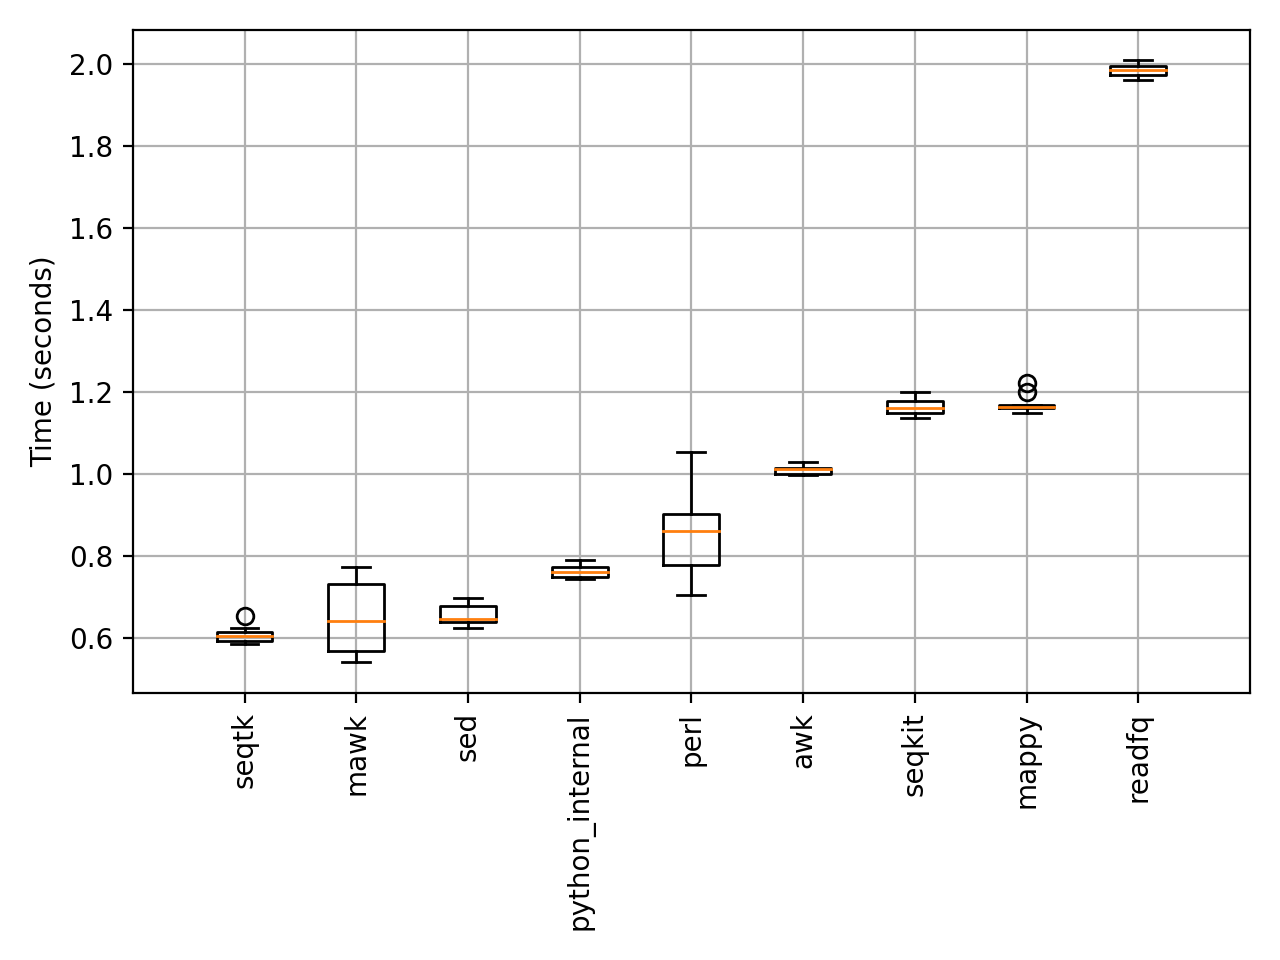

In [58]:
from IPython.display import Image
Image('bioconvert.png', height=600, width=800)
